In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

data = pd.read_csv('WeatherEvents_Jan2016-Dec2022.csv')

# Convert 'StartTime(UTC)' and 'EndTime(UTC)' columns to datetime objects
data['StartTime(UTC)'] = pd.to_datetime(data['StartTime(UTC)'])
data['EndTime(UTC)'] = pd.to_datetime(data['EndTime(UTC)'])

# Extracting useful features from datetime columns
data['StartMonth'] = data['StartTime(UTC)'].dt.month
data['StartHour'] = data['StartTime(UTC)'].dt.hour
# Add more features as needed (day, year, etc.)

# One-hot encode the 'State' column
data = pd.get_dummies(data, columns=['State'])

# Selecting relevant columns for prediction
relevant_columns = ['StartMonth', 'StartHour', 'Precipitation(in)', 'LocationLat', 'LocationLng'] + [col for col in data.columns if col.startswith('State_')]

# Separating features and target variable
X = data[relevant_columns].drop('Precipitation(in)', axis=1)
y = data['Precipitation(in)']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the model (Linear Regression in this case)
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting for test data
predictions_lr = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions_lr)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.8276949521292342


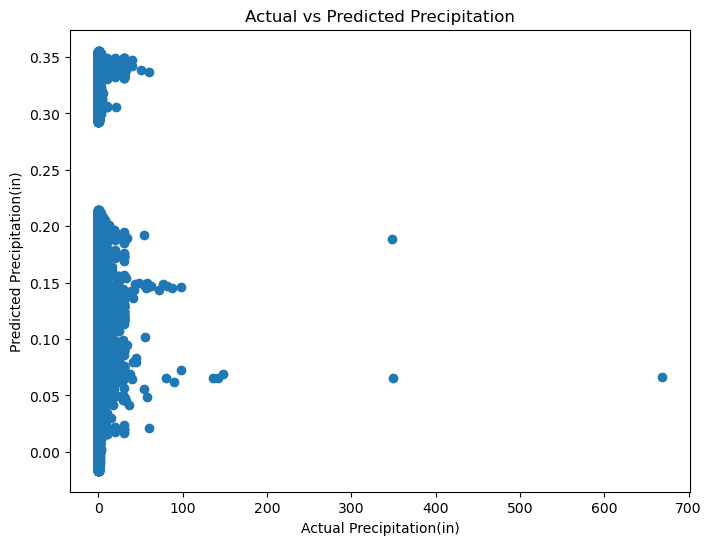

In [2]:
import matplotlib.pyplot as plt

# Plotting predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions_lr)
plt.xlabel('Actual Precipitation(in)')
plt.ylabel('Predicted Precipitation(in)')
plt.title('Actual vs Predicted Precipitation')
plt.show()


In [3]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, predictions_lr))
print(f"Root Mean Squared Error (RMSE): {rmse}")


Root Mean Squared Error (RMSE): 0.90977741900381


In [6]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

weather_df = pd.read_csv('WeatherEvents_Jan2016-Dec2022.csv')

# Selecting relevant columns for prediction
columns_for_prediction = [
    'LocationLat', 'LocationLng', 'State', 'City', 'County', 'Precipitation(in)'
]
weather_selected = weather_df[columns_for_prediction]

# Handling missing values if needed
weather_selected = weather_selected.dropna()  # Dropping rows with missing values, handle as appropriate for your data

# Reduce the scope of categorical columns (you can adjust the threshold as needed)
categorical_columns = ['State', 'City', 'County']
for col in categorical_columns:
    if weather_selected[col].nunique() > 50:  # Example threshold: Only include columns with less than 50 unique values
        weather_selected = weather_selected.drop(col, axis=1)

# Convert categorical variables to numerical using one-hot encoding
weather_encoded = pd.get_dummies(weather_selected)

# Separating features and target variable
X = weather_encoded.drop('Precipitation(in)', axis=1)  # Features
y = weather_encoded['Precipitation(in)']  # Target variable

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust hyperparameters here

# Train the model
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
predictions_rf = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions_rf)
r2 = r2_score(y_test, predictions_rf)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 0.5395128958656038
R-squared (R2): 0.0842948940547249


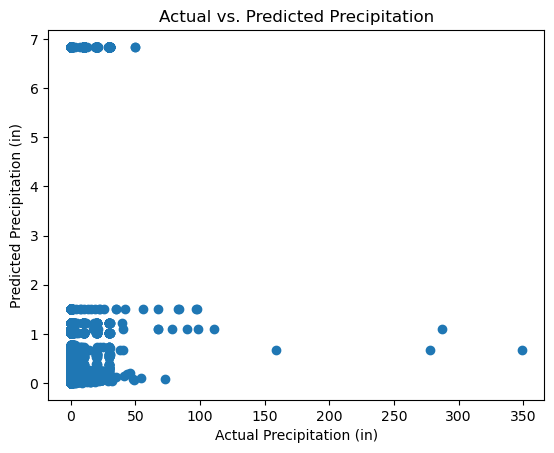

In [7]:
import matplotlib.pyplot as plt

# Scatter plot for Actual vs. Predicted values
plt.scatter(y_test, predictions_rf)
plt.xlabel('Actual Precipitation (in)')
plt.ylabel('Predicted Precipitation (in)')
plt.title('Actual vs. Predicted Precipitation')
plt.show()


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

weather_df = pd.read_csv('WeatherEvents_Jan2016-Dec2022.csv')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost regressor
xgboost_regressor = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)  # Adjust hyperparameters as needed

# Train the model
xgboost_regressor.fit(X_train, y_train)

# Make predictions on the test set
predictions_xgb = xgboost_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions_xgb)
r2 = r2_score(y_test, predictions_xgb)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")


Mean Squared Error (MSE): 0.5401855356070049
R-squared (R2): 0.08315323525401264


In [12]:
from sklearn.metrics import mean_squared_error, r2_score

y_test_lr = y_test[:len(predictions_lr)]
y_test_rf = y_test[:len(predictions_rf)]
y_test_xgb = y_test[:len(predictions_xgb)]

# Calculate MSE for each model
mse_lr = mean_squared_error(y_test_lr, predictions_lr[:len(y_test_lr)])
mse_rf = mean_squared_error(y_test_rf, predictions_rf[:len(y_test_rf)])
mse_xgb = mean_squared_error(y_test_xgb, predictions_xgb[:len(y_test_xgb)])

# Calculate R2 for each model
r2_lr = r2_score(y_test_lr, predictions_lr[:len(y_test_lr)])
r2_rf = r2_score(y_test_rf, predictions_rf[:len(y_test_rf)])
r2_xgb = r2_score(y_test_xgb, predictions_xgb[:len(y_test_xgb)])

# Print the results
print("Mean Squared Error (MSE):")
print(f"Linear Regression: {mse_lr}")
print(f"Random Forest: {mse_rf}")
print(f"XGBoost: {mse_xgb}")
print("\nR-squared (R2):")
print(f"Linear Regression: {r2_lr}")
print(f"Random Forest: {r2_rf}")
print(f"XGBoost: {r2_xgb}")


Mean Squared Error (MSE):
Linear Regression: 0.5919089070772898
Random Forest: 0.5395128958656038
XGBoost: 0.5401855356070049

R-squared (R2):
Linear Regression: -0.004635871762703747
Random Forest: 0.0842948940547249
XGBoost: 0.08315323525401264
